<a href="https://colab.research.google.com/github/anapbatista/Fundamentos-em-Ciencia-de-Dados/blob/main/F1_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

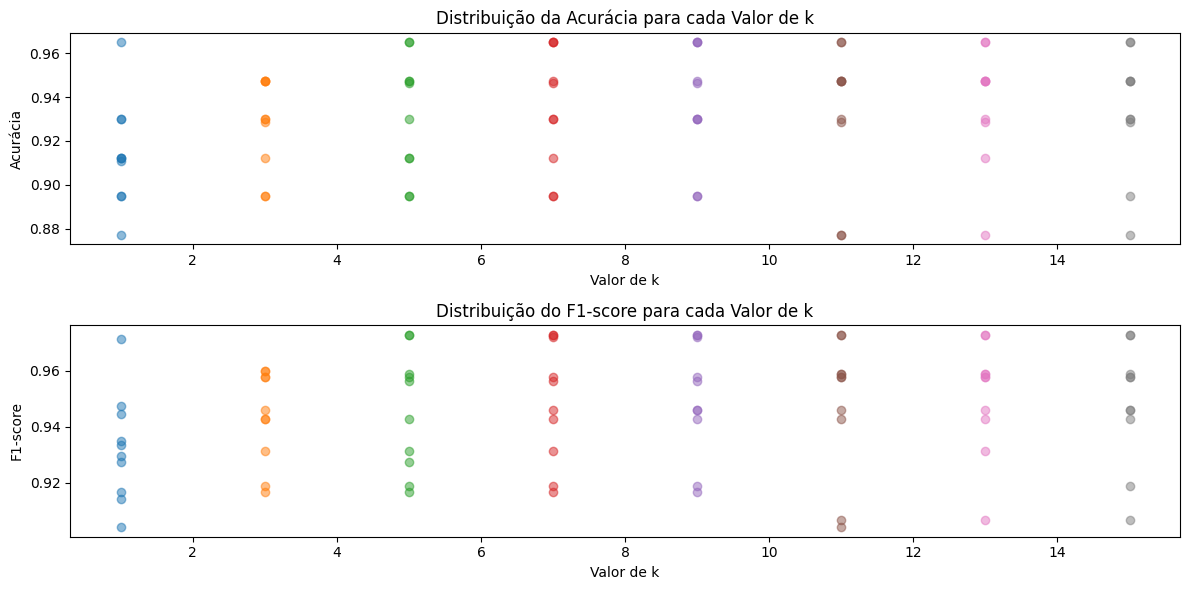

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# Carregar os dados
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Atributos preditores e alvo
X = df.values
y = data.target

# Criar o cross-validator com 10 folds
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

# Listas para armazenar os resultados
accuracy_results = []
f1_results = []

# Definindo os valores de k
k_values = np.arange(1, 16, 2)  # k de 1 a 15, pulando de dois em dois

# Iterar sobre cada fold
for train_index, val_index in folds.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Iterar sobre cada valor de k
    for k in k_values:
        # Criar e treinar o classificador k-NN
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)

        # Fazer previsões no conjunto de validação
        y_pred = knn_classifier.predict(X_val)

        # Calcular acurácia e F1-score
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Armazenar resultados para este valor de k
        accuracy_results.append((k, accuracy))
        f1_results.append((k, f1))

# Converter resultados em DataFrame
accuracy_df = pd.DataFrame(accuracy_results, columns=['k', 'accuracy'])
f1_df = pd.DataFrame(f1_results, columns=['k', 'f1'])

# Plotar gráfico de distribuição do erro para cada k
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Acurácia
plt.subplot(2, 1, 1)
for k, group in accuracy_df.groupby('k'):
    plt.plot([k] * len(group), group['accuracy'], 'o', alpha=0.5)
plt.title('Distribuição da Acurácia para cada Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')

# F1-score
plt.subplot(2, 1, 2)
for k, group in f1_df.groupby('k'):
    plt.plot([k] * len(group), group['f1'], 'o', alpha=0.5)
plt.title('Distribuição do F1-score para cada Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()
